# Crimes against women in India


### This project contains the data record of all types of crime against women in india in the span of year 2001-2014. Main aim of working on this project is to reflect the situation of women in our society and raise concern about this matter.



In [24]:
import numpy as np 
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
main_data = pd.read_csv("D:\crime against women 2001-2014\crimes_against_women_2001-2014.csv")

In [5]:
main_data.sample(5)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
824,824,BIHAR,SARAN,2002,12,10,69,0,0,85,0
1789,1789,MADHYA PRADESH,SHEOPUR,2003,19,1,1,51,0,11,0
9628,611,Rajasthan,ZZ TOTAL,2013,3285,4047,453,4829,25,15094,1
5865,5865,LAKSHADWEEP,TOTAL,2008,2,1,0,0,0,1,0
1674,1674,JHARKHAND,DHANBAD RLY.,2003,0,3,1,1,0,0,0


## Data Preprocessing

In [7]:
# we don't need Unnamed: 0 column so let's drop it
main_data.drop("Unnamed: 0", axis = 1, inplace = True)


In [8]:
# let's rename the columns
main_data.rename(columns = {"STATE/UT": "State", "DISTRICT": "District",
                            "Kidnapping and Abduction": "Kidnapping",
                            "Assault on women with intent to outrage her modesty": "Assault",
                           "Insult to modesty of Women": "Insult",
                            "Cruelty by Husband or his Relatives":"Cruelty by Husband",
                           "Importation of Girls":"Importation"}, inplace = True)

In [9]:
# replace space to underscore
main_data.columns = main_data.columns.str.replace(" ", "_")

In [10]:
main_data.columns

Index(['State', 'District', 'Year', 'Rape', 'Kidnapping', 'Dowry_Deaths',
       'Assault', 'Insult', 'Cruelty_by_Husband', 'Importation'],
      dtype='object')

In [11]:
main_data.sample(5)

,State,District,Year,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Cruelty_by_Husband,Importation
6785,CHHATTISGARH,TOTAL,2010,1012,279,115,1706,182,861,2
3047,GUJARAT,GANDHINAGAR,2005,9,20,4,8,4,101,0
7925,ODISHA,PURI,2011,21,27,27,16,1,98,0
8284,ASSAM,NALBARI,2012,34,89,3,83,0,131,0
1895,ODISHA,JAJPUR,2003,17,21,19,18,0,73,0


In [12]:
# let's convert all the state and district name into upper case
main_data.State = main_data.State.str.upper()
main_data.District = main_data.District.str.upper()

In [13]:
# let's check unique state names
main_data.State.unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT', 'TELANGANA'], dtype=object)

In [14]:
# there is A & N ISLANDS and A&N ISLANDS and D & N HAVELI and D&N HAVELI both are same so let's fix it
main_data.State.replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
main_data.State.replace("D&N HAVELI", "D & N HAVELI", inplace = True)

In [15]:
# there is district name is TOTAL DISTRICT(S) which is totals of district cases but we don't need it at this time
# so let's drop that row
main_data.drop(index = main_data.loc[main_data.District == "TOTAL DISTRICT(S)"].index, inplace = True)
# there is also one district named ZZ TOTAL so it's not need so let's drop it
main_data.drop(index = main_data.loc[main_data.District == "ZZ TOTAL"].index, inplace = True)

## Exploratory Analysis and Visualization

## Women Crimes Year Wise

In [16]:
# preparing year wise data
year_wise_data = main_data.groupby("Year").sum().reset_index()

In [26]:
classy = year_wise_data.melt(id_vars = "Year", var_name = "Cases")
px.treemap(data_frame=classy, path = ["Year", "Cases"], values="value", title = "Women Crimes Year Wise")

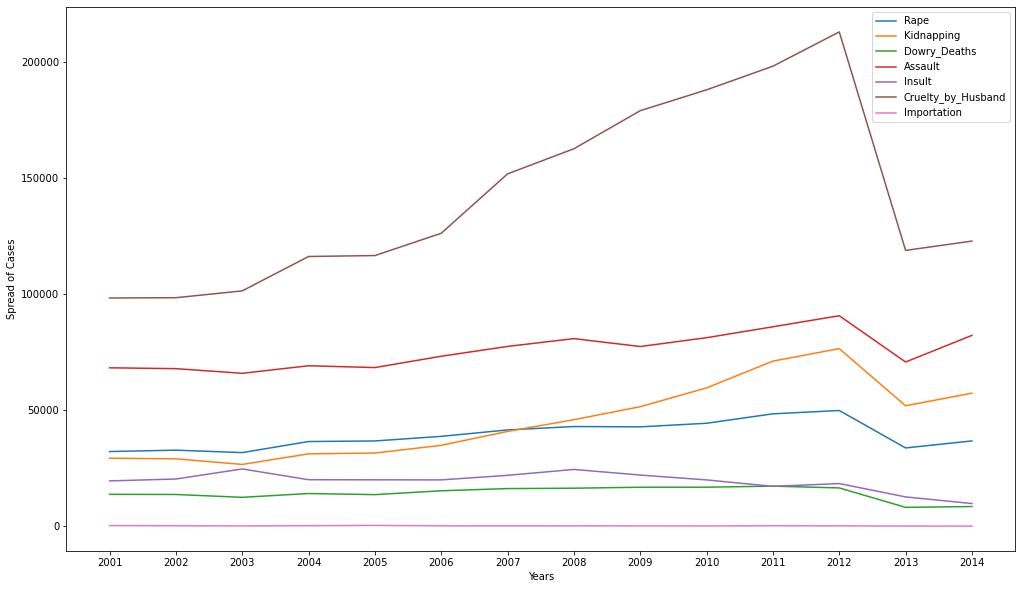

In [29]:
# women crime year wise line plot
plt.figure(figsize=(17,10))
for i in year_wise_data.columns:
    if i == "Year":
        continue
    plt.plot(year_wise_data.Year, year_wise_data[i], label = i)
plt.xlabel("Years")
plt.ylabel("Spread of Cases")
plt.xticks(year_wise_data.Year)
plt.legend()
plt.show()

## Time wise analysis of particular state

#### enter the state name and you will get the year wise cases of that particular state

In [30]:
time_wise = main_data.groupby(["State", "Year"]).sum().reset_index()
state = input("Enter the State Name: ").upper() or "UTTAR PRADESH"
state = state if state in main_data.State.unique() else "UTTAR PRADESH"
time_wise = time_wise.loc[time_wise.State == state]
time_wise = time_wise.melt(id_vars = ["Year", "State"], var_name = "Cases")
px.area(data_frame=time_wise, x = "Year", y = "value", color = "Cases", title = "Time wise analysis of " + state)

Enter the State Name: Karnataka


## comparison with 2001 and 2014 cases

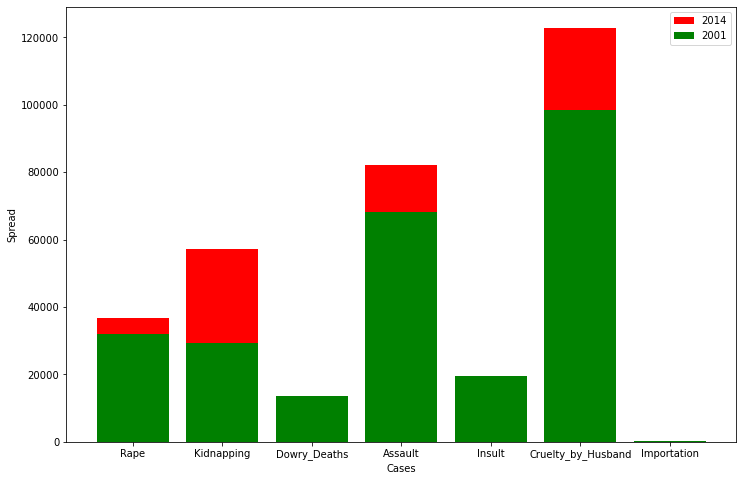

In [36]:
year_2001 = year_wise_data.loc[year_wise_data.Year == 2001]
year_2001 = year_2001.melt(id_vars = "Year", var_name = "Cases")
year_2014 = year_wise_data.loc[year_wise_data.Year == 2014]
year_2014 = year_2014.melt(id_vars = "Year", var_name = "Cases")
plt.figure(figsize = (12, 8))
plt.bar(year_2014.Cases, year_2014.value, color = "r", label = "2014")
plt.bar(year_2001.Cases, year_2001.value, color = "g", label = "2001")
plt.legend()
plt.xlabel("Cases")
plt.ylabel("Spread")
plt.show()

## Year 2014 women crime data analysis

In [32]:
classy = main_data.groupby(["State", "Year"]).sum().reset_index()
classy = classy.loc[classy.Year == 2014]

### Rape cases in 2014 state wise analysis

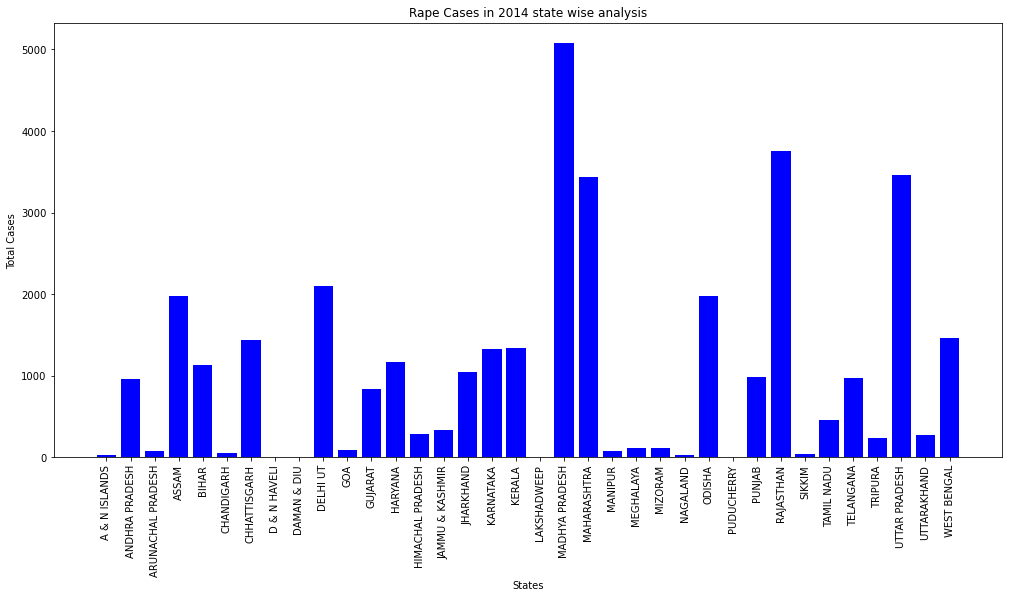

In [40]:
Rape = classy.loc[:, ["State", "Rape"]]
plt.figure(figsize = (17, 8))
plt.bar(Rape.State, Rape.Rape, color = "b")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Rape.State, rotation = "vertical")
plt.title("Rape Cases in 2014 state wise analysis")
plt.show()


### Kidnapping cases in 2014 state wise analysis

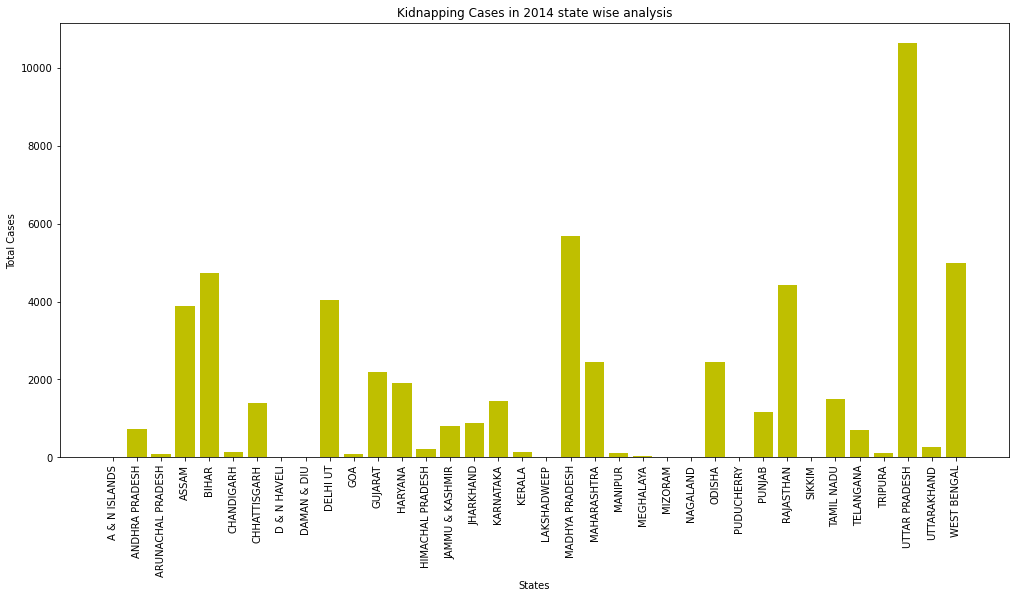

In [41]:
Kidnapping = classy.loc[:, ["State", "Kidnapping"]]
plt.figure(figsize = (17, 8))
plt.bar(Kidnapping.State, Kidnapping.Kidnapping, color = "y")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Kidnapping.State, rotation = "vertical")
plt.title("Kidnapping Cases in 2014 state wise analysis")
plt.show()

### Dowry_Deaths cases in 2014 state wise analysis

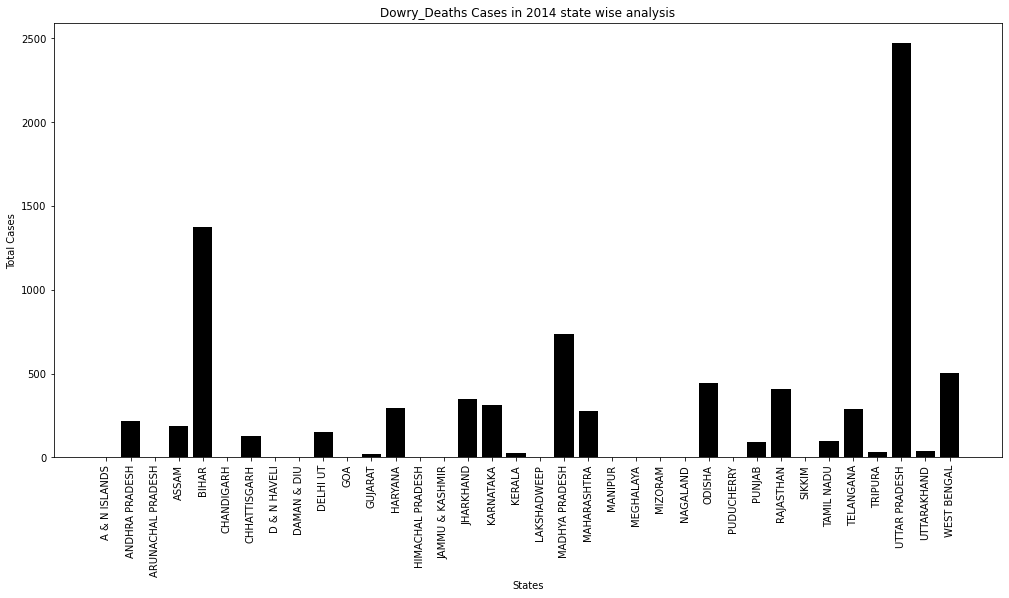

In [42]:
Dowry_Deaths = classy.loc[:, ["State", "Dowry_Deaths"]]
plt.figure(figsize = (17, 8))
plt.bar(Dowry_Deaths.State, Dowry_Deaths.Dowry_Deaths, color = "black")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Dowry_Deaths.State, rotation = "vertical")
plt.title("Dowry_Deaths Cases in 2014 state wise analysis")
plt.show()


### Assault cases in 2014 state wise analysis

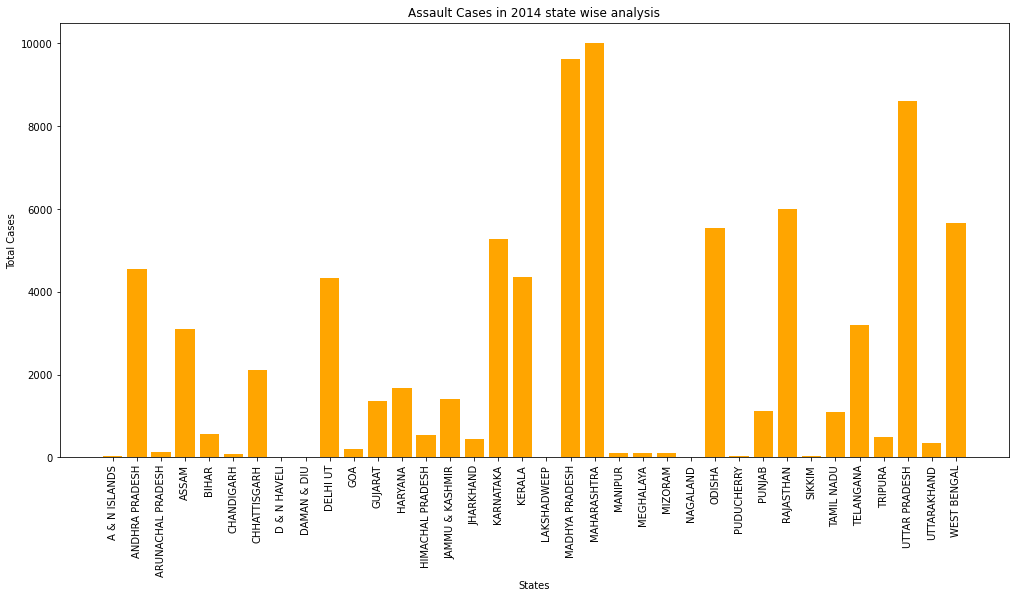

In [43]:
Assault = classy.loc[:, ["State", "Assault"]]
plt.figure(figsize = (17, 8))
plt.bar(Assault.State, Assault.Assault, color = "orange")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Assault.State, rotation = "vertical")
plt.title("Assault Cases in 2014 state wise analysis")
plt.show()


### Insult cases in 2014 state wise analysis

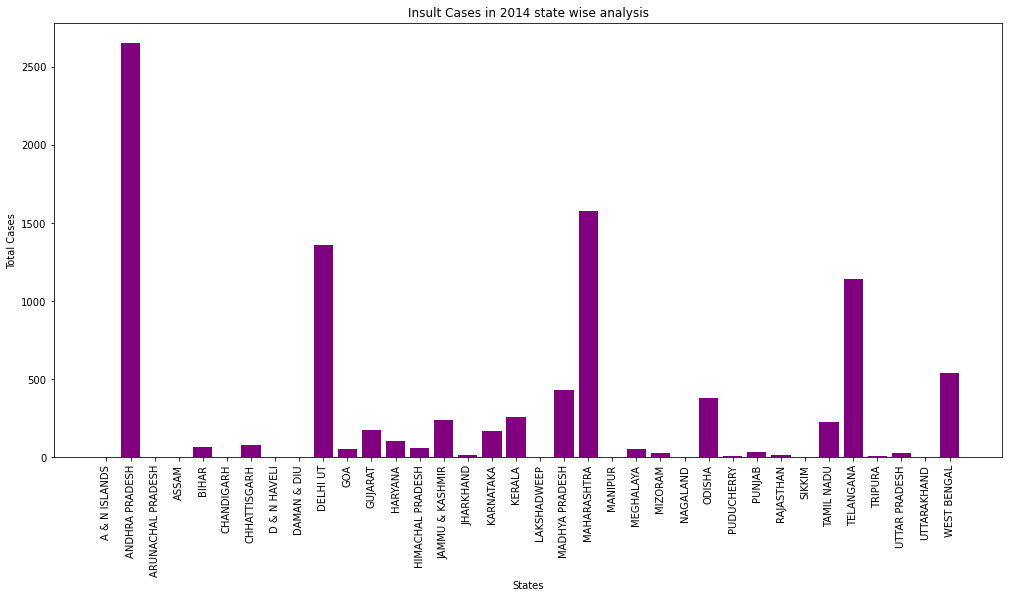

In [44]:
Insult = classy.loc[:, ["State", "Insult"]]
plt.figure(figsize = (17, 8))
plt.bar(Insult.State, Insult.Insult, color = "purple")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Insult.State, rotation = "vertical")
plt.title("Insult Cases in 2014 state wise analysis")
plt.show()


### Cruelty_by_Husband cases in 2014 state wise analysis

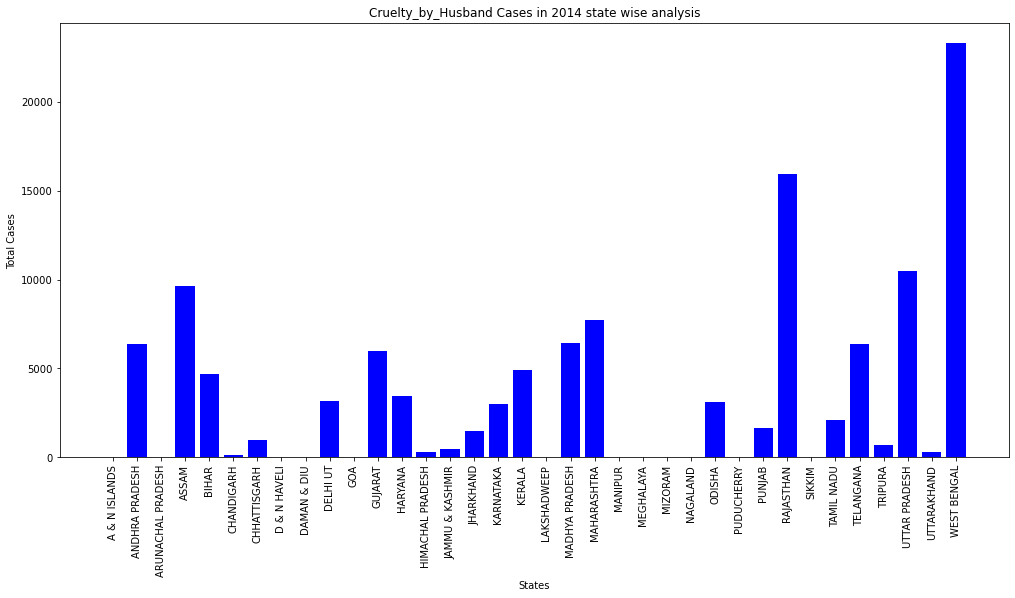

In [45]:
Cruelty_by_Husband = classy.loc[:, ["State", "Cruelty_by_Husband"]]
plt.figure(figsize = (17, 8))
plt.bar(Cruelty_by_Husband.State, Cruelty_by_Husband.Cruelty_by_Husband, color = "b")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Cruelty_by_Husband.State, rotation = "vertical")
plt.title("Cruelty_by_Husband Cases in 2014 state wise analysis")
plt.show()

### Importation cases in 2014 state wise analysis

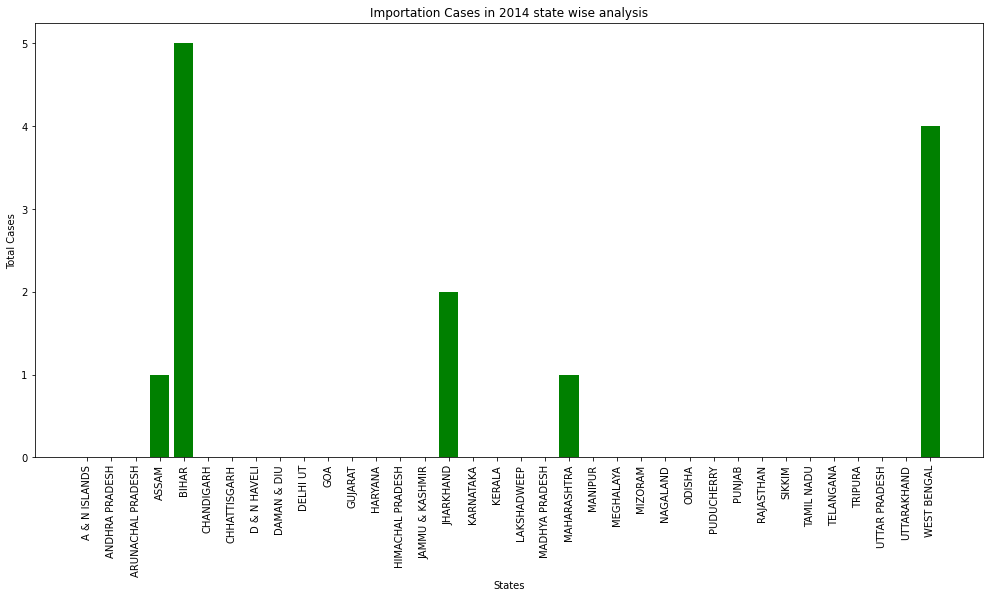

In [46]:
Importation = classy.loc[:, ["State", "Importation"]]
plt.figure(figsize = (17, 8))
plt.bar(Importation.State, Importation.Importation, color = "g")
plt.xlabel("States")
plt.ylabel("Total Cases")
plt.xticks(Importation.State, rotation = "vertical")
plt.title("Importation Cases in 2014 state wise analysis")
plt.show()


# Top 10 states affected by particular crime

### Top 10 states affected by Rape Cases

In [47]:
topRape = Rape.sort_values("Rape", ascending = False).reset_index(drop = True)[:10]
topRape.style.background_gradient(cmap = "Reds")

,State,Rape
0,MADHYA PRADESH,5076
1,RAJASTHAN,3759
2,UTTAR PRADESH,3467
3,MAHARASHTRA,3438
4,DELHI UT,2096
5,ASSAM,1980
6,ODISHA,1978
7,WEST BENGAL,1466
8,CHHATTISGARH,1436
9,KERALA,1347


In [48]:
px.pie(data_frame=topRape, names = "State", values="Rape", title = "Rape cases in top 10 states")

### Top 10 states affected by Kidnapping Cases

In [49]:
topKidnapping = Kidnapping.sort_values("Kidnapping", ascending = False).reset_index(drop = True)[:10]
topKidnapping.style.background_gradient(cmap = "YlGn")

,State,Kidnapping
0,UTTAR PRADESH,10626
1,MADHYA PRADESH,5688
2,WEST BENGAL,4976
3,BIHAR,4735
4,RAJASTHAN,4421
5,DELHI UT,4034
6,ASSAM,3895
7,MAHARASHTRA,2457
8,ODISHA,2436
9,GUJARAT,2187


In [50]:
px.pie(data_frame=topKidnapping, names = "State", values="Kidnapping", title = "Kidnapping cases in top 10 states")

### Top 10 states affected by Dowry_Deaths Cases

In [54]:
topDowry_Deaths = Dowry_Deaths.sort_values("Dowry_Deaths", ascending = False).reset_index(drop = True)[:10]
topDowry_Deaths.style.background_gradient(cmap = "Greys")

,State,Dowry_Deaths
0,UTTAR PRADESH,2469
1,BIHAR,1373
2,MADHYA PRADESH,733
3,WEST BENGAL,501
4,ODISHA,441
5,RAJASTHAN,408
6,JHARKHAND,350
7,KARNATAKA,313
8,HARYANA,293
9,TELANGANA,289


In [55]:
px.pie(data_frame=topDowry_Deaths, names = "State", values="Dowry_Deaths", title = "Dowry_Deaths cases in top 10 states")

### Top 10 states affected by Assault Cases

In [56]:
topAssault = Assault.sort_values("Assault", ascending = False).reset_index(drop = True)[:10]
topAssault.style.background_gradient(cmap = "Oranges")

,State,Assault
0,MAHARASHTRA,10001
1,MADHYA PRADESH,9609
2,UTTAR PRADESH,8605
3,RAJASTHAN,5999
4,WEST BENGAL,5670
5,ODISHA,5543
6,KARNATAKA,5263
7,ANDHRA PRADESH,4547
8,KERALA,4367
9,DELHI UT,4322


In [57]:
px.pie(data_frame=topAssault, names = "State", values="Assault", title = "Assault cases in top 10 states")

### Top 10 states affected by Insult Cases

In [58]:
topInsult = Insult.sort_values("Insult", ascending = False).reset_index(drop = True)[:10]
topInsult.style.background_gradient(cmap = "Purples")

,State,Insult
0,ANDHRA PRADESH,2649
1,MAHARASHTRA,1575
2,DELHI UT,1361
3,TELANGANA,1142
4,WEST BENGAL,543
5,MADHYA PRADESH,429
6,ODISHA,379
7,KERALA,257
8,JAMMU & KASHMIR,237
9,TAMIL NADU,229


In [59]:
px.pie(data_frame=topInsult, names = "State", values="Insult", title = "Insult cases in top 10 states")


### Top 10 states affected by Cruelty_by_Husband Cases

In [60]:
topCruelty_by_Husband = Cruelty_by_Husband.sort_values("Cruelty_by_Husband", ascending = False).reset_index(drop = True)[:10]
topCruelty_by_Husband.style.background_gradient(cmap = "Blues")

,State,Cruelty_by_Husband
0,WEST BENGAL,23278
1,RAJASTHAN,15905
2,UTTAR PRADESH,10471
3,ASSAM,9626
4,MAHARASHTRA,7696
5,MADHYA PRADESH,6451
6,TELANGANA,6369
7,ANDHRA PRADESH,6362
8,GUJARAT,5991
9,KERALA,4919


In [61]:
px.pie(data_frame=topCruelty_by_Husband, names = "State", values="Cruelty_by_Husband", title = "Cruelty_by_Husband cases in top 10 states")


### Top 10 states affected by Importation Cases

In [62]:
topImportation = Importation.sort_values("Importation", ascending = False).reset_index(drop = True)[:10]
topImportation.style.background_gradient(cmap = "Greens")

,State,Importation
0,BIHAR,5
1,WEST BENGAL,4
2,JHARKHAND,2
3,ASSAM,1
4,MAHARASHTRA,1
5,PUNJAB,0
6,MEGHALAYA,0
7,MIZORAM,0
8,NAGALAND,0
9,ODISHA,0


In [63]:
px.pie(data_frame=topImportation, names = "State", values="Importation", title = "Importation cases in top 10 states")

## District wise analysis of #1 state affected by particular crime in year 2014

In [64]:
district_2014 =  main_data.groupby(["State", "District", "Year"]).sum().reset_index()
district_2014 = district_2014.loc[district_2014.Year == 2014]

### #1 State affected by Rape Cases

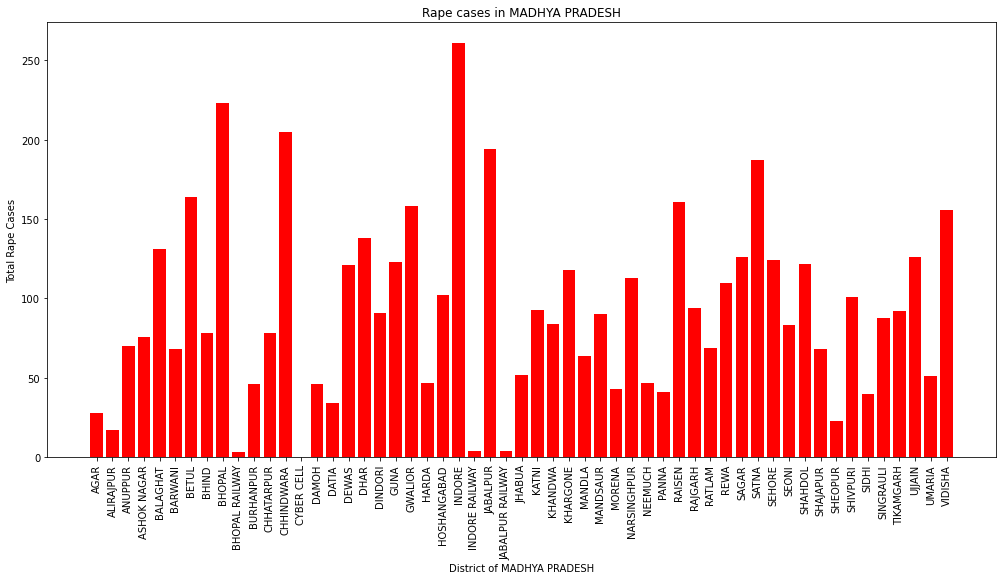

In [65]:
state = topRape.State[0]
districtRape = district_2014.loc[district_2014.State == state, ["State", "District", "Rape"]]
plt.figure(figsize = (17, 8))
plt.bar(districtRape.District, districtRape.Rape, color = "r")
plt.xlabel("District of " + state)
plt.ylabel("Total Rape Cases")
plt.xticks(districtRape.District, rotation = "vertical")
plt.title("Rape cases in " + state)
plt.show()


### #1 State affected by Kidnapping Cases

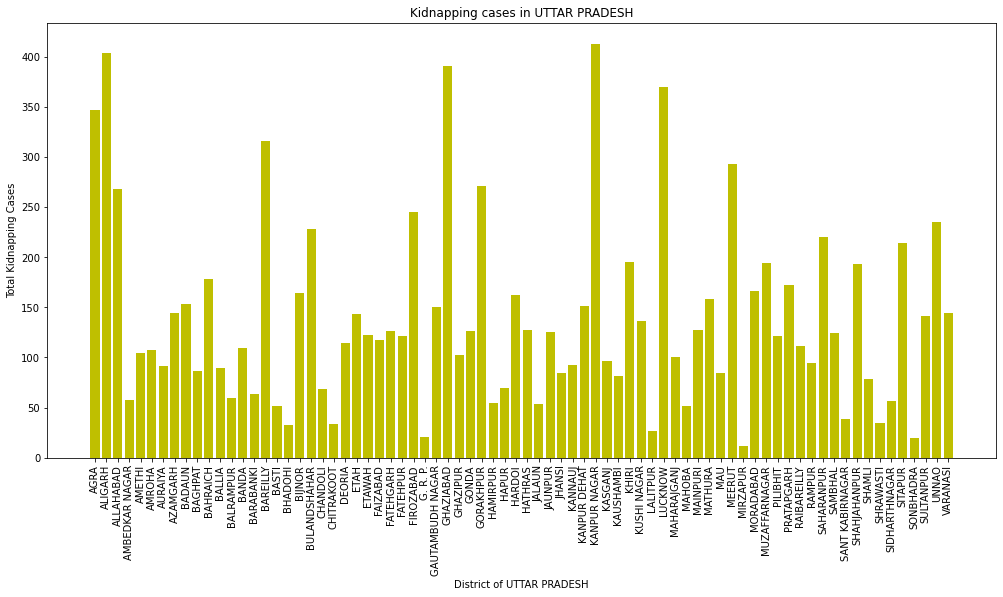

In [66]:
state = topKidnapping.State[0]
districtKidnapping = district_2014.loc[district_2014.State == state, ["State", "District", "Kidnapping"]]
plt.figure(figsize = (17, 8))
plt.bar(districtKidnapping.District, districtKidnapping.Kidnapping, color = "y")
plt.xlabel("District of " + state)
plt.ylabel("Total Kidnapping Cases")
plt.xticks(districtKidnapping.District, rotation = "vertical")
plt.title("Kidnapping cases in " + state)
plt.show()


### #1 State affected by Dowry_Deaths Cases

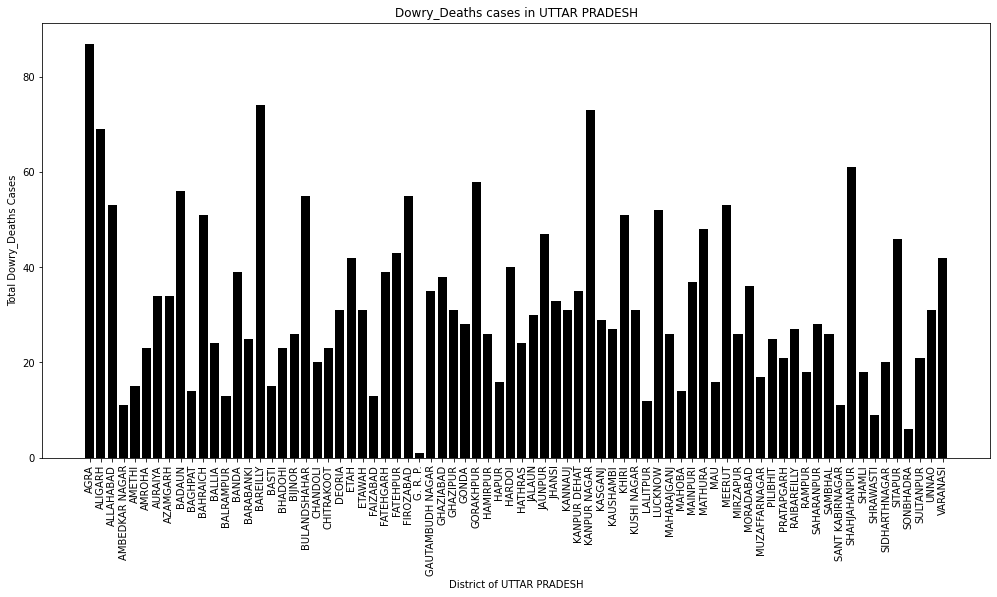

In [67]:
state = topDowry_Deaths.State[0]
districtDowry_Deaths = district_2014.loc[district_2014.State == state, ["State", "District", "Dowry_Deaths"]]
plt.figure(figsize = (17, 8))
plt.bar(districtDowry_Deaths.District, districtDowry_Deaths.Dowry_Deaths, color = "black")
plt.xlabel("District of " + state)
plt.ylabel("Total Dowry_Deaths Cases")
plt.xticks(districtDowry_Deaths.District, rotation = "vertical")
plt.title("Dowry_Deaths cases in " + state)
plt.show()

### #1 State affected by Assault Cases

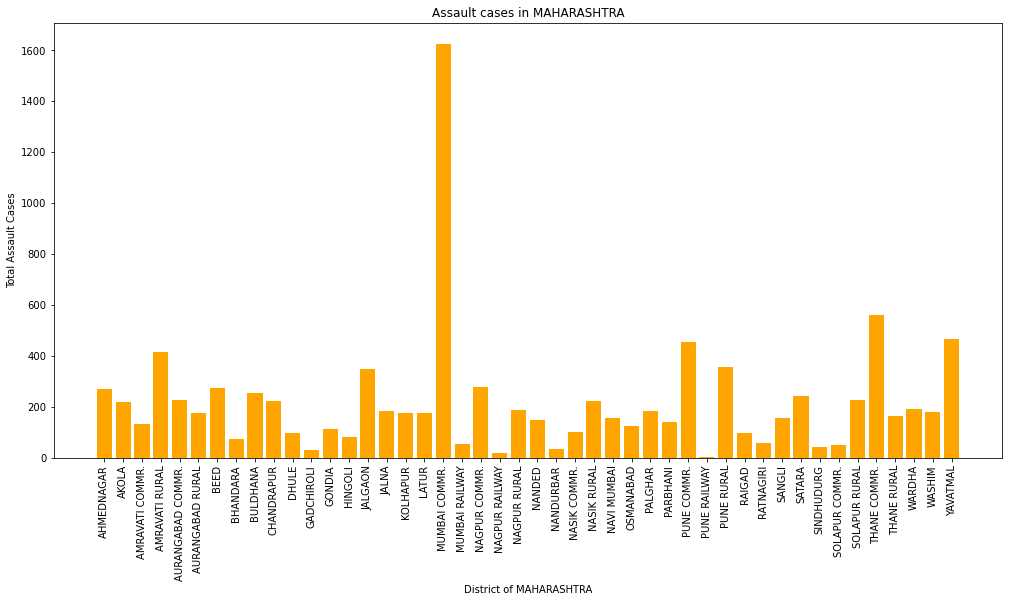

In [68]:
state = topAssault.State[0]
districtAssault = district_2014.loc[district_2014.State == state, ["State", "District", "Assault"]]
plt.figure(figsize = (17, 8))
plt.bar(districtAssault.District, districtAssault.Assault, color = "orange")
plt.xlabel("District of " + state)
plt.ylabel("Total Assault Cases")
plt.xticks(districtAssault.District, rotation = "vertical")
plt.title("Assault cases in " + state)
plt.show()


### #1 State affected by Insult Cases

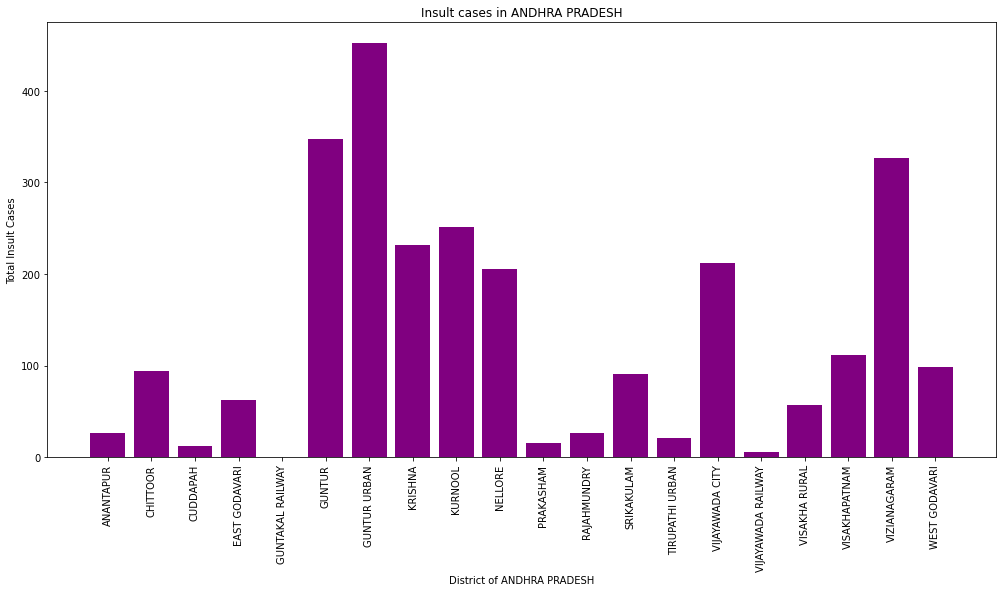

In [69]:
state = topInsult.State[0]
districtInsult = district_2014.loc[district_2014.State == state, ["State", "District", "Insult"]]
plt.figure(figsize = (17, 8))
plt.bar(districtInsult.District, districtInsult.Insult, color = "purple")
plt.xlabel("District of " + state)
plt.ylabel("Total Insult Cases")
plt.xticks(districtInsult.District, rotation = "vertical")
plt.title("Insult cases in " + state)
plt.show()


### #1 State affected by Cruelty_by_Husband Cases

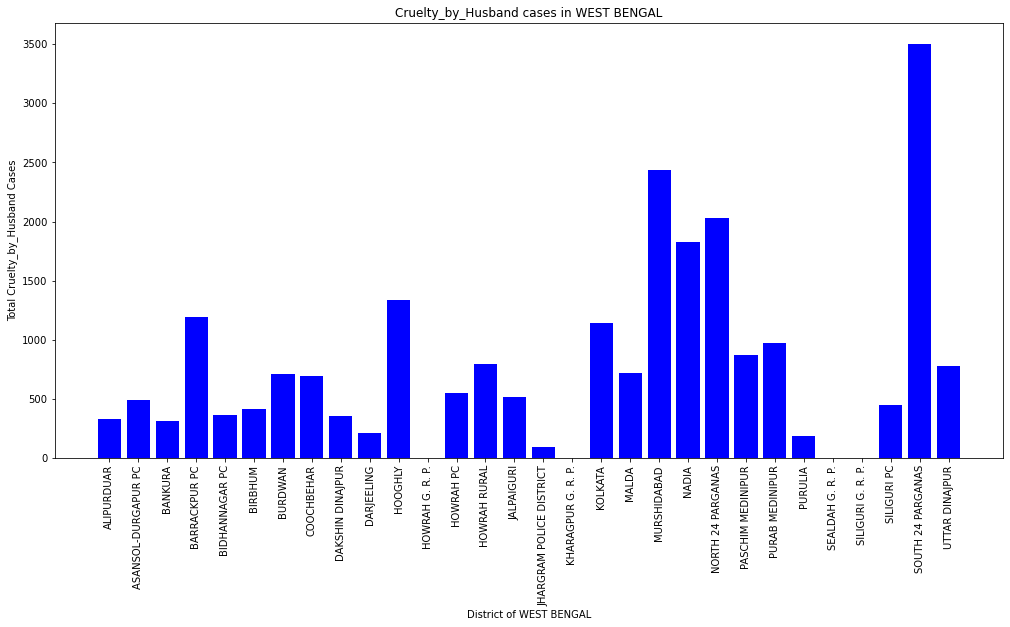

In [70]:
state = topCruelty_by_Husband.State[0]
districtCruelty_by_Husband = district_2014.loc[district_2014.State == state, ["State", "District", "Cruelty_by_Husband"]]
plt.figure(figsize = (17, 8))
plt.bar(districtCruelty_by_Husband.District, districtCruelty_by_Husband.Cruelty_by_Husband, color = "b")
plt.xlabel("District of " + state)
plt.ylabel("Total Cruelty_by_Husband Cases")
plt.xticks(districtCruelty_by_Husband.District, rotation = "vertical")
plt.title("Cruelty_by_Husband cases in " + state)
plt.show()

### #1 State affected by Importation Cases

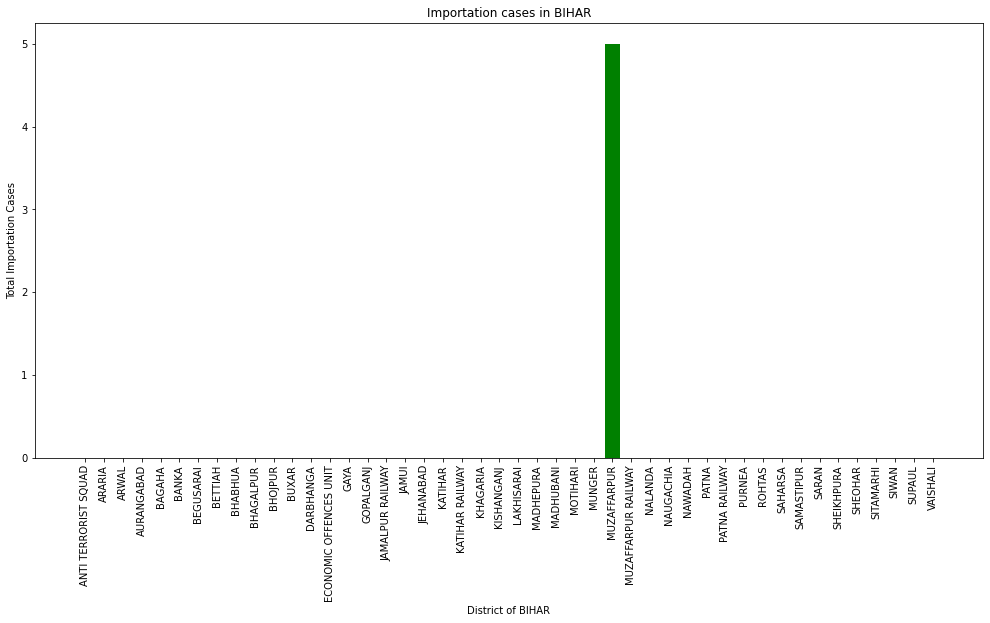

In [71]:
state = topImportation.State[0]
districtImportation = district_2014.loc[district_2014.State == state, ["State", "District", "Importation"]]
plt.figure(figsize = (17, 8))
plt.bar(districtImportation.District, districtImportation.Importation, color = "g")
plt.xlabel("District of " + state)
plt.ylabel("Total Importation Cases")
plt.xticks(districtImportation.District, rotation = "vertical")
plt.title("Importation cases in " + state)
plt.show()


## District wise analysis of all cases

### enter the state name and you will get that district wise data of that particular state

In [72]:
state = input("Enter State Name: ").upper() or "ANDHRA PRADESH"
classy = district_2014.loc[district_2014.State == state]
classy = classy.melt(id_vars = ["Year", "State", "District"], var_name = "Cases")
px.sunburst(data_frame = classy, path = ["District", "Cases"], values = "value", color = "Cases", height=600,
           title = "District wise status of " + state)

Enter State Name: karnataka
